# Plotting

There are many python plotting libraries depending on your purpose. However, the standard general-purpose library is `matplotlib`. This is often used through its `pyplot` interface.

In [2]:
from matplotlib import pyplot
%matplotlib inline

The command `%matplotlib inline` is not a Python command, but an *IPython* command. When using the console, or the notebook, it makes the plots appear inline. You do not want to use this in a plain Python code.

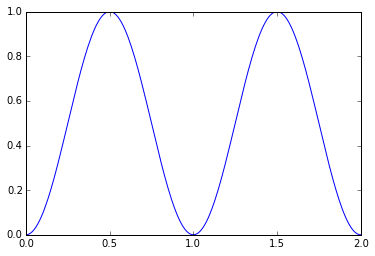

In [5]:
from math import sin, pi

x = []
y = []
for i in range(201):
    x.append(0.01*i)
    y.append(sin(pi*x[-1])**2)

pyplot.plot(x, y)
pyplot.show()

We have defined two sequences - in this case lists, but tuples would also work. One contains the $x$-axis coordinates, the other the data points to appear on the $y$-axis. A basic plot is produced using the `plot` command of `pyplot`. However, this plot will not automatically appear on the screen, as after plotting the data you may wish to add additional information. Nothing will actually happen until you either save the figure to a file (using `pyplot.savefig(<filename>)`) or explicitly ask for it to be displayed (with the `show` command). When the plot is displayed the program will typically pause until you dismiss the plot.

This plotting interface is straightforward, but the results are not particularly nice. The following commands illustrate some of the ways of improving the plot:

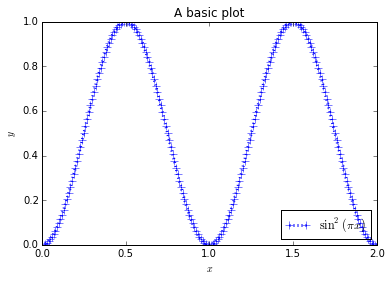

In [9]:
from math import sin, pi

x = []
y = []
for i in range(201):
    x.append(0.01*i)
    y.append(sin(pi*x[-1])**2)

pyplot.plot(x, y, marker='+', markersize=8, linestyle=':', 
            linewidth=3, color='b', label=r'$\sin^2(\pi x)$')
pyplot.legend(loc='lower right')
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$y$')
pyplot.title('A basic plot')
pyplot.show()

Whilst most of the commands are self-explanatory, a note should be made of the strings line `r'$x$'`. These strings are in LaTeX format, which is *the* standard typesetting method for professional-level mathematics. The `$` symbols surround mathematics. The `r` before the definition of the string is Python notation, not LaTeX. It says that the following string will be "raw": that backslash characters should be left alone. Then, special LaTeX commands have a backslash in front of them: here we use `\pi` and `\sin`. Most basic symbols can be easily guess (eg `\theta` or `\int`), but there are [useful lists of symbols](http://www.artofproblemsolving.com/wiki/index.php/LaTeX:Symbols), and a [reverse search site](http://detexify.kirelabs.org/classify.html) available. We can also use `^` to denote superscripts (used here), `_` to denote subscripts, and use `{}` to group terms.

By combining these basic commands with other plotting types (`semilogx` and `loglog`, for example), most simple plots can be produced quickly.

Here are some more examples:

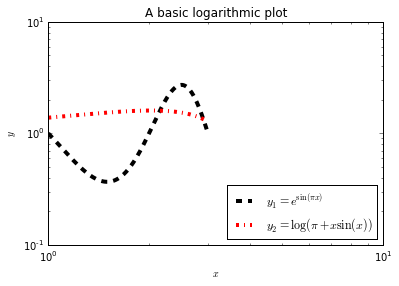

In [14]:
from math import sin, pi, exp, log

x = []
y1 = []
y2 = []
for i in range(201):
    x.append(1.0+0.01*i)
    y1.append(exp(sin(pi*x[-1])))
    y2.append(log(pi+x[-1]*sin(x[-1])))

pyplot.loglog(x, y1, linestyle='--', linewidth=4, 
              color='k', label=r'$y_1=e^{\sin(\pi x)}$')
pyplot.loglog(x, y2, linestyle='-.', linewidth=4, 
              color='r', label=r'$y_2=\log(\pi+x\sin(x))$')
pyplot.legend(loc='lower right')
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$y$')
pyplot.title('A basic logarithmic plot')
pyplot.show()

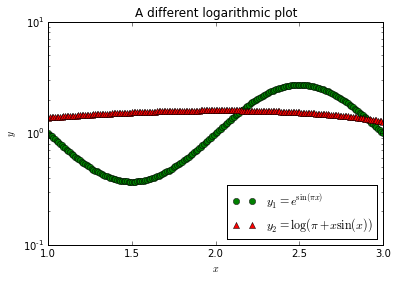

In [15]:
from math import sin, pi, exp, log

x = []
y1 = []
y2 = []
for i in range(201):
    x.append(1.0+0.01*i)
    y1.append(exp(sin(pi*x[-1])))
    y2.append(log(pi+x[-1]*sin(x[-1])))

pyplot.semilogy(x, y1, linestyle='None', marker='o', 
              color='g', label=r'$y_1=e^{\sin(\pi x)}$')
pyplot.semilogy(x, y2, linestyle='None', marker='^', 
              color='r', label=r'$y_2=\log(\pi+x\sin(x))$')
pyplot.legend(loc='lower right')
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$y$')
pyplot.title('A different logarithmic plot')
pyplot.show()

We will look at more complex plots later, but the [matplotlib documentation](http://matplotlib.org/api/pyplot_summary.html) contains a lot of details, and the [gallery](http://matplotlib.org/gallery.html) contains a lot of examples that can be adapted to fit. There is also an [extremely useful document](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb) as part of [Johansson's lectures on scientific python](https://github.com/jrjohansson/scientific-python-lectures).